# <Center> HW 4: Classification </center>

<div class="alert alert-block alert-warning">Each assignment needs to be completed independently. Never ever copy others' work (even with minor modification, e.g. changing variable names). Anti-Plagiarism software will be used to check all submissions. </div>

In this assignment, we use classification to identify public's concerns towards vaccines. This assignment needs the following two data files, which are created from https://www.kaggle.com/datasets/prox37/twitter-multilabel-classification-dataset/data:
- hw4_train.csv: dataset for training
- hw4_test.csv: dataset for testing
    
The dataset can be loaded as follows.

Note, this is `multi-label classification` problem. The `labels` column may contains multiple labels, separated by space. For example, `ineffective side-effect` indicates there are two labels: `ineffective` and `side-effect`

In [1]:
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell

pd.options.display.float_format = "{:,.4f}".format
InteractiveShell.ast_node_interactivity = "all"
np.random.seed(2021)

In [3]:
train = pd.read_csv("hw4_train.csv")
train.head(3)
train_x,train_y = train['tweet'],train['labels']
test = pd.read_csv("hw4_test.csv")
test_x,test_y = test['tweet'],test['labels']
test.head(3)

,tweet,labels
0,Moderna now openly running vaccine experiments...,rushed
1,Crimes of Covid Vaccine Maker Pfizer Documente...,side-effect pharma
2,@Carlygrishamm They’re already saying that som...,side-effect


,tweet,labels
0,Austria suspends AstraZeneca/Oxford vaccine af...,side-effect
1,@cmyeaton @HotlineJosh Vaccines do a good job ...,ineffective side-effect
2,@gbriz11 @BuschGardens Flu vaccines are only 4...,ineffective


## Q1 Multilabel text classification 

**(Q1.1.)** Define a function `classify(train_x, train_y, test_x, test_y, model = LinearSVC(), binary=False, ngrams = (1,1), stop_words='english', min_df=1, pos_class = 'side-effect',show_plots=True)`, where


- `train_x`: is a list of documents for training.
- `train_y`: is the ground-truth labels of training documents.
- `test_x`: is a list of documents for test.
- `test_y`: is the ground-truth labels of test documents.
- `model`: the name of classification algorithm. The default value is `LinearSVC()`.
- `binary`: if true, within a document, the term frequency of a word is binarized to 1 if present and 0 otherwise. If False, the regular term frequency is considered. The default is False.
- `ngrams`: an option to include unigrams, bigrams, ..., nth grams. The default is (1,1), i.e., only unigrams used.
- `stop_words`: indicate whether stop words should be removed. The default value is 'english', i.e. remove English stopwords.
- `min_df`: only tokens with document frequency above this threshold can be included. The default is 1.
- `pos_class`: the class you choose to print out ROC and PRC plots. The default value is `side-effect`.
- `show_plots`: controls whether to show classification report AND plots. The default is False.


This function does the following:
- Process `train_y` and `test_y` to get binarized dummies for each label
- Create a pipeline to include
    - a `TfidfVectorizer` using `train_x` with options `stop_words, min_df, ngrams, binary` as specified in the function inputs. Extract features from `train_x` using the fitted `TfidfVectorizer`.
    - a one-vs-the-rest classifier wrapper on top of the specified `model`. 
- Fit the pipeline using the extracted features from `train_x` and labels from `train_y`.
- Transform `test_x` by the fitted `TfidfVectorizer` (hint: use function `transform` not `fit_transform`).
- Predict the labels for `test_x` with trained model.
- Print the classification report
- If `show_plots` is True,
    - Plot the AUC score and PRC score (or Average Precision) for the class `pos_class` on the test dataset. On the plot, specify xlabel, ylabel on axis, and the scoring metrics (AUC/PRC/Average Precision) on the title.
    - Note, if the model is 'svm', please use `decision_function` for AUC/PRC calculation. The details can be found at https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC.decision_function.
- Return the trained pipeline.
    



**(Q1.2.)** Test your function with following cases:
- `stop_words = 'english', binary = False, model = LinearSVC(), pos_class = 'side-effect', show_plots = True`
- `stop_words = 'english', binary = False, model = LinearSVC(),pos_class = 'conspiracy', show_plots = True`


**Analysis**:
- Both should have over 85 AUC scores. However, `side-effect` class has over 80% PRC score while the PRC score for `conspiracy` is below 50%.
- Explain why these two classes have similar AUC scores but dramatically different PRC scores
- Which metric do you think is more reliable? Why?

**(Q1.3.) Bonus**: Redo Q1.1 and Q1.2 to use `Naive Bayes` algorithm. Answer the following question:


- How does `Naive Bayes` perform on this dataset?
- Please explain the performance of this model analytically, i.e., why is its performance good or bad?


Note, you may need to modify the function slightly, since `Naive Bayes` does not have `decision_function` but `predict_prob` function

In [90]:
def classify(train_x, train_y, test_x, test_y, \
            binary=False, ngrams = (1,1), \
            stop_words='english', min_df=1, \
            pos_class = 'side-effect',
            model = LinearSVC(),
            show_plots=True):
    
    classifier = None
    
    # add your code

    return classifier
    #return  clf, tfidf_vect

/Users/rliu20/miniconda3/envs/pytorch/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

  conspiracy       0.76      0.22      0.35       116
     country       0.62      0.21      0.31        38
 ineffective       0.74      0.53      0.62       297
 ingredients       0.79      0.33      0.46        95
   mandatory       0.87      0.50      0.64       145
        none       0.56      0.07      0.12       129
      pharma       0.73      0.48      0.58       254
   political       0.56      0.20      0.30       122
   religious       1.00      0.36      0.53        11
      rushed       0.79      0.54      0.64       297
 side-effect       0.82      0.71      0.76       789
 unnecessary       0.80      0.30      0.44       148

   micro avg       0.78      0.50      0.61      2441
   macro avg       0.75      0.37      0.48      2441
weighted avg       0.77      0.50      0.59      2441
 samples avg       0.55      0.52      0.52      2441



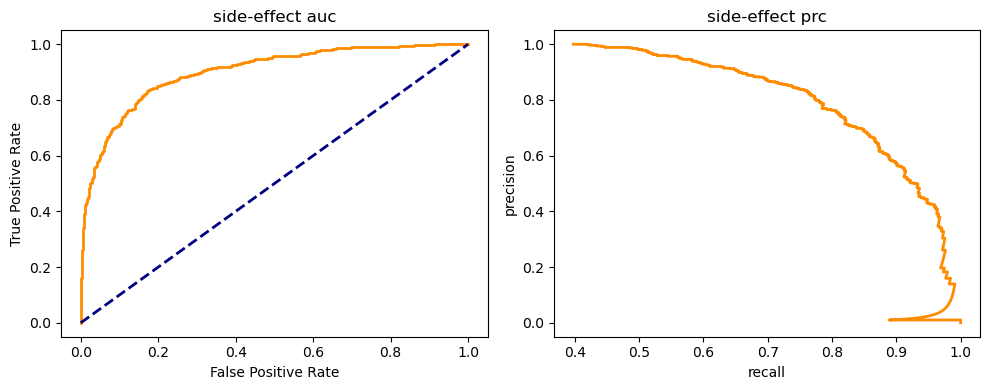

side-effect AUC: 90.12%, PRC: 87.07%


In [93]:
# Test case 1:

classifier = classify(train.tweet, train.labels,
         test.tweet, test.labels,
         stop_words = 'english', binary = False, min_df = 1,
         model = LinearSVC(),
         pos_class = 'side-effect',
         #model = MultinomialNB(), 
         #model = XGBClassifier(random_state=42, seed=2, colsample_bytree=0.6, subsample=0.7),
         show_plots = True)


In [ ]:
# Test case 2:


# Your analysis here!

### Q2: Search for best parameters (2 points)

`Pipeline: 0.3; grid search with proper parameters: 1.0; train model with best parameter: 0.2; discussion: 0.5`

From Q1, you may find there are many possible ways to configure parameters. Next, let's use grid search to find the optimal parameters.

- Define a function `search_para(docs, y, model = LinearSVC())` where `docs` are training documents, `y` is the ground-truth labels, and `model` is the model you use on top of the one-vs-the-rest classifier wrapper (the default one is SVM).
- This function does the following:
    - Create a pipleline which integrates `TfidfVectorizer` and the classifier wrapper as in Q1.1. 
    - Define the parameter ranges as follow: 
        - `stop_words: [None, 'english']`
        - `min_df:[1, 2]`
        - `ngram_range:[(1,1), (1,2)]`
        - `C: [0.5, 1, 2]`: this is the misclassification penalty of SVM. Hint, assuming the one-vs-the-rest wrapper is named "cls", this parameter should be defined as `clf__estimator__C':[0.5,1,2]` in grid search, where `estimator` denotes the SVM model used by the wrapper.
    - Set the scoring metric to `f1_macro`. 
    - Use `GridSearchCV` with `4-fold cross validation` to find the best parameter values based on the training dataset. 
    - Print the values of the `best` parameters combination. 
    
- Call this function to find `the best parameters combination` for linear SVM model. 
- Call the function `classify` again to use `the best parameters combination`



**Please answer the following**: 
- Compared with the model in Q1, how is the performance improved on the test dataset?
- Why do you think the new parameter values help deceptive comment classification?

In [79]:
def search_para(docs, y, model = LinearSVC()):

     # add your code here

In [80]:
search_para(train.tweet, train.labels)

clf__estimator__C:	2
tfidf__min_df:	2
tfidf__ngram_range:	(1, 1)
tfidf__stop_words:	None
best f1 score: 0.476


In [ ]:
# Call the classifier again using the best parameters



**Q3 (Bonus)** Improve the classification performance


Apparently, the model does not perform well. Can you find a way to improve the model performance, in particular, for those minority classes? You objective is to improve the maco F1 by at least 5%.


Implement your model and explain why your method can improve the performance.